# Submitted By: - Sagar Purswani (purswanisagar60@gmail.com)

# Task for ML Intern at ImagoAI

## In this assignment i will focus on processing hyperspectral imaging data and predicting DON concentration in corn samples using machine learning.
## Following are the overview of the tasks that i would be completing: -
1. EDA and data pre processing
2. Reducing dimensions (PCA or t-SNE)
3. Building Model
4. Evaluating Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
data = pd.read_csv('/content/TASK-ML-INTERN.csv')

In [3]:
data.head(10)

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
5,imagoai_corn_5,0.403326,0.399065,0.392410,0.393671,0.375779,0.369329,0.366484,0.379903,0.329242,...,0.703310,0.698116,0.695797,0.697344,0.694916,0.682640,0.675877,0.695633,0.694361,1400.0
6,imagoai_corn_6,0.369181,0.398294,0.382156,0.355960,0.357118,0.347124,0.347773,0.323305,0.346832,...,0.673438,0.658581,0.676906,0.671280,0.661223,0.659227,0.662984,0.674590,0.667481,1100.0
7,imagoai_corn_7,0.386569,0.408519,0.394123,0.394363,0.390526,0.379103,0.383645,0.370810,0.361250,...,0.819083,0.807260,0.786323,0.794155,0.784517,0.798741,0.800099,0.810282,0.770466,500.0
8,imagoai_corn_8,0.439140,0.432694,0.423883,0.421475,0.411783,0.407528,0.385764,0.389579,0.367873,...,0.706239,0.705595,0.718282,0.707036,0.712581,0.720497,0.701015,0.704241,0.731010,100.0
9,imagoai_corn_9,0.439308,0.430286,0.419468,0.402224,0.401832,0.399487,0.362857,0.351145,0.351157,...,0.700342,0.705466,0.705582,0.688853,0.715501,0.706368,0.690124,0.698683,0.689356,1100.0


In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (500, 450)


In [ ]:
data.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [4]:
missing_values = data.isnull().sum().sum()
print("Total Missing Values:", missing_values)

Total Missing Values: 0


In [5]:
data_numeric = data.drop(columns=['hsi_id'])

In [6]:
spectral_columns = data_numeric.columns[:-1]
target_column = 'vomitoxin_ppb'

In [ ]:
print("Summary Statistics:\n", data_numeric.describe())

Summary Statistics:
                 0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.0437

In [ ]:
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)

Outliers per column:
 0                 0
1                 0
2                 0
3                 0
4                 0
                 ..
444              11
445              11
446              10
447              13
vomitoxin_ppb    80
Length: 449, dtype: int64


 Keeping Outliers (Assuming They Are True Observations)

If outliers in vomitoxin_ppb and spectral bands represent real variations in corn samples, i will not remove them.
Instead, i can use models that are robust to outliers, such as:
Random Forest (not sensitive to outliers)
XGBoost (handles extreme values well)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.iloc[:, 1:-1])
print("Data standardized successfully!")


Data standardized successfully!


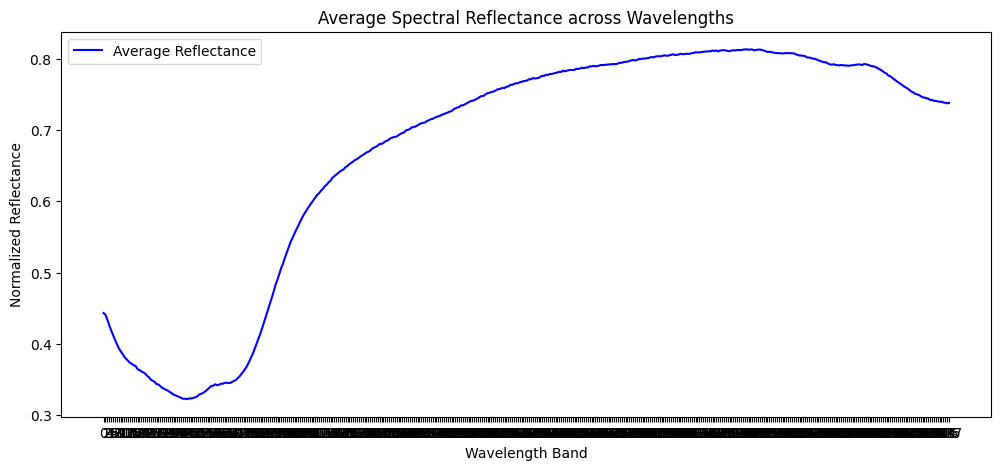

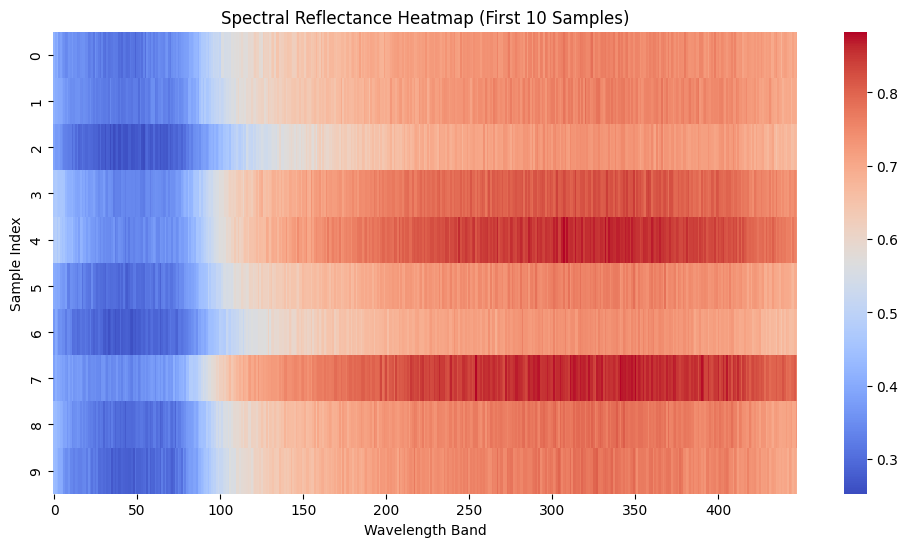

In [ ]:
# Plot average spectral reflectance
plt.figure(figsize=(12, 5))
plt.plot(spectral_columns, data_numeric[spectral_columns].mean(), label="Average Reflectance", color='blue')
plt.xlabel("Wavelength Band")
plt.ylabel("Normalized Reflectance")
plt.title("Average Spectral Reflectance across Wavelengths")
plt.legend()
plt.show()

# Heatmap for first 10 samples
plt.figure(figsize=(12, 6))
sns.heatmap(data_numeric.iloc[:10, :-1], cmap="coolwarm", xticklabels=50)
plt.xlabel("Wavelength Band")
plt.ylabel("Sample Index")
plt.title("Spectral Reflectance Heatmap (First 10 Samples)")
plt.show()

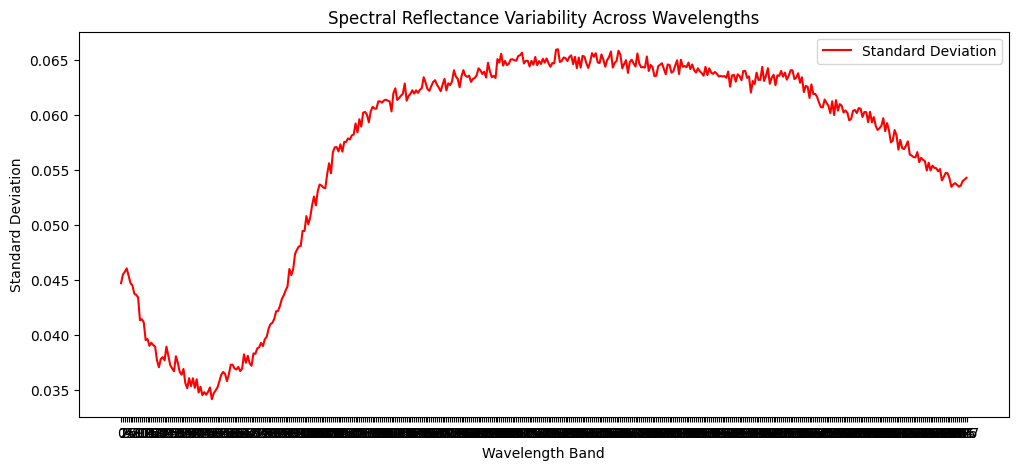

In [ ]:
# Compute standard deviation for each wavelength band
std_per_band = data_numeric[spectral_columns].std()

# Plot standard deviation to detect noisy bands
plt.figure(figsize=(12, 5))
plt.plot(spectral_columns, std_per_band, color='red', label="Standard Deviation")
plt.xlabel("Wavelength Band")
plt.ylabel("Standard Deviation")
plt.title("Spectral Reflectance Variability Across Wavelengths")
plt.legend()
plt.show()


Interpretation:

Bands with unusually high standard deviation might be noisy.

Some bands have near-zero variance, they may not add value for machine learning and can be removed.

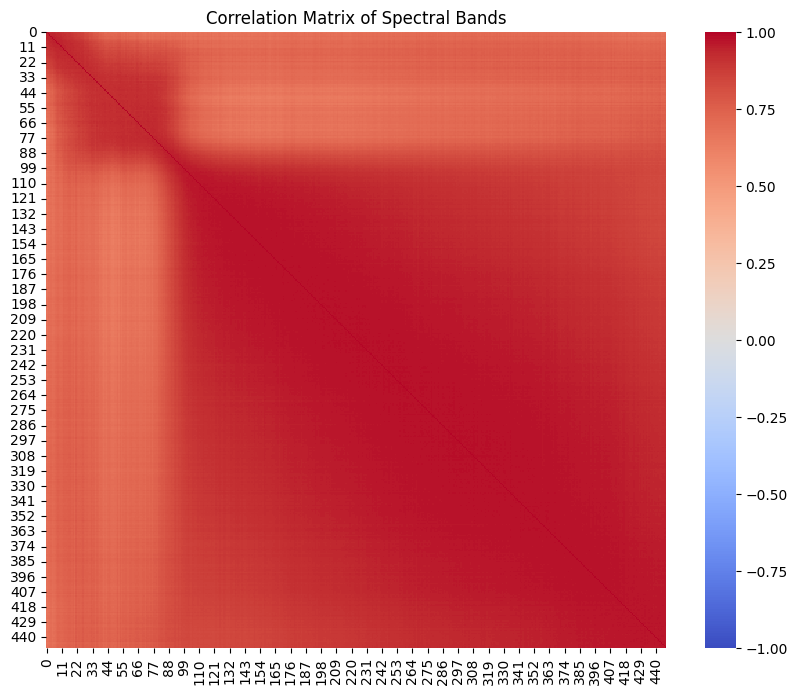

In [ ]:
# Compute correlation matrix
corr_matrix = data_numeric[spectral_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Spectral Bands")
plt.show()


Interpretation:

If many bands are strongly correlated, PCA will help reduce dimensions effectively.

If some bands are uncorrelated with others, they might be important features for mycotoxin prediction.

# Applying Dimensionality Reduction techniques

In [8]:
# PCA Implementation
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [9]:
explained_variance

array([0.87077909, 0.92926978, 0.95039272])

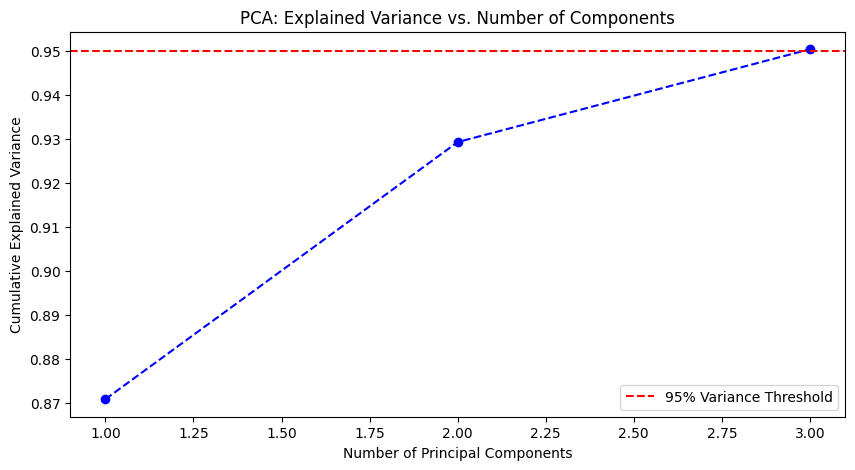

Number of components explaining 95% variance: 3


In [ ]:
# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.legend()
plt.show()

# Print the number of components selected
print(f"Number of components explaining 95% variance: {X_pca.shape[1]}")


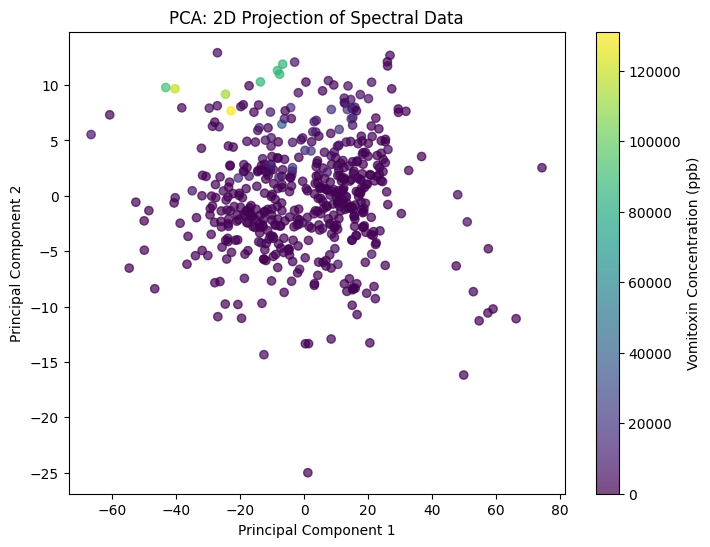

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["vomitoxin_ppb"], cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: 2D Projection of Spectral Data")
plt.colorbar(label="Vomitoxin Concentration (ppb)")
plt.show()


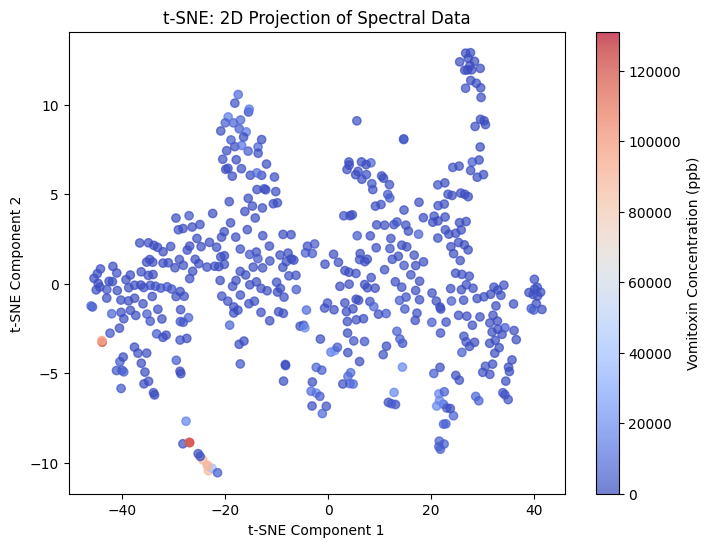

In [10]:
# Apply t-SNE (for better clustering)
from sklearn.manifold import TSNE

# Apply t-SNE (reduce to 2D)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE visualization
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data["vomitoxin_ppb"], cmap="coolwarm", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE: 2D Projection of Spectral Data")
plt.colorbar(label="Vomitoxin Concentration (ppb)")
plt.show()


# Since the points are overlapping in my opinion dataset might need further preprocessing.But lets see later on after training model and finding its performance

# Step 3 : Training Model

## In this section or part of the task i will be training some traditional ML models like Random Forest and XGBoost and evaluating their performance and later on if i fel the need of Deep Learning Models i will try some of them too.

In [11]:
#  Training a Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
X = X_pca  # Using PCA-transformed features (3 components)
y = data["vomitoxin_ppb"]  # Target variable (DON concentration)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [14]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Performance:\n MAE: {mae:.2f} \n RMSE: {rmse:.2f} \n R² Score: {r2:.2f}")


Random Forest Performance:
 MAE: 1798.10 
 RMSE: 3751.89 
 R² Score: 0.95


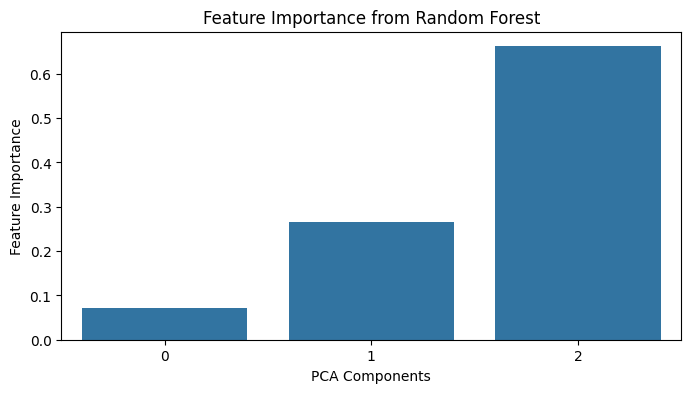

In [ ]:
# Feature importance from Random Forest
feature_importance = rf_model.feature_importances_

# Plot importance
plt.figure(figsize=(8, 4))
sns.barplot(x=np.arange(len(feature_importance)), y=feature_importance)
plt.xlabel("PCA Components")
plt.ylabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()


In [ ]:
# Training an XGBoost Regressor
from xgboost import XGBRegressor

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Compute performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Performance:\n MAE: {mae_xgb:.2f} \n RMSE: {rmse_xgb:.2f} \n R² Score: {r2_xgb:.2f}")


XGBoost Performance:
 MAE: 1805.82 
 RMSE: 4221.16 
 R² Score: 0.94


In [ ]:
print("Model Comparison:")
print(f"Random Forest  -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
print(f"XGBoost        -> MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")


Model Comparison:
Random Forest  -> MAE: 1798.10, RMSE: 3751.89, R²: 0.95
XGBoost        -> MAE: 1805.82, RMSE: 4221.16, R²: 0.94


# HyperParameter Tuning on ML models

In [ ]:
# Random Forest Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define hyperparameter grid
param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [ ]:
# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                      param_distributions=param_grid_rf,
                                      n_iter=10, cv=3, verbose=2, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Get the best parameters
best_rf = rf_random_search.best_estimator_
print("Best Parameters for Random Forest:", rf_random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [ ]:
# Evaluate tuned RF model
y_pred_best_rf = best_rf.predict(X_test)
mae_rf_best = mean_absolute_error(y_test, y_pred_best_rf)
rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_rf_best = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest Performance:\n MAE: {mae_rf_best:.2f} \n RMSE: {rmse_rf_best:.2f} \n R² Score: {r2_rf_best:.2f}")

Tuned Random Forest Performance:
 MAE: 1801.95 
 RMSE: 3879.86 
 R² Score: 0.95


## As i can see that the tuned Random Forest model still maintains an R² score of 0.95, but the RMSE slightly increased compared to the default model (from 3751.89 to 3879.86). This suggests that the tuning process did not significantly improve the performance.

In [ ]:
# Hyperparameter Tuning for XGBoost
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [ ]:
# Define hyperparameter grid for XGBoost
param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

In [ ]:
# Initialize RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(XGBRegressor(random_state=42),
                                       param_distributions=param_grid_xgb,
                                       n_iter=10, cv=3, verbose=2, n_jobs=-1)
# Fit the model
xgb_random_search.fit(X_train, y_train)

# Get the best parameters
best_xgb = xgb_random_search.best_estimator_
print("Best Parameters for XGBoost:", xgb_random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [ ]:
# Evaluate tuned XGBoost model
y_pred_best_xgb = best_xgb.predict(X_test)
mae_xgb_best = mean_absolute_error(y_test, y_pred_best_xgb)
rmse_xgb_best = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2_xgb_best = r2_score(y_test, y_pred_best_xgb)

print(f"Tuned XGBoost Performance:\n MAE: {mae_xgb_best:.2f} \n RMSE: {rmse_xgb_best:.2f} \n R² Score: {r2_xgb_best:.2f}")


Tuned XGBoost Performance:
 MAE: 2116.61 
 RMSE: 4430.76 
 R² Score: 0.93


## The tuned XGBoost model performed worse than the default one.
# Conclusion: Random Forest is the Best ML Model So Far
# Random Forest: Best Performance with R² = 0.95, RMSE = 3751.89

# Now trying Deep Learning Models

# I will try following models:-
1. DNN
2. CNN
3. LSTM

# And basic workflow which i will be following is as follows: -
1. Data Preparation
2. Model Architecture
3. Compilation & Training
4. Evaluation & Hyperparameter Tuning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convert to NumPy arrays
X = data_numeric.iloc[:, :-1].values  # Spectral features
y = data_numeric.iloc[:, -1].values   # Target (vomitoxin_ppb)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Build DNN model
def build_dnn_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.3),  # Prevent overfitting
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='linear')  # Regression output
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    return model

In [ ]:
# Train DNN model
dnn_model = build_dnn_model()

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = dnn_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        batch_size=32,
                        callbacks=[early_stopping],
                        verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 145641136.0000 - mae: 2921.2400 - val_loss: 297815936.0000 - val_mae: 4346.5786
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 135144096.0000 - mae: 2878.9836 - val_loss: 292689280.0000 - val_mae: 4345.7129
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 161569920.0000 - mae: 3203.8860 - val_loss: 281434016.0000 - val_mae: 4619.9766
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 113179968.0000 - mae: 3241.4941 - val_loss: 261438000.0000 - val_mae: 4858.3076
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 200183520.0000 - mae: 4077.9070 - val_loss: 241321552.0000 - val_mae: 4954.9268
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 85779224.0000 - mae: 3231.2991 - val_loss: 215984560.0000 - val_mae: 4768.5029
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 47087488.0000 - mae: 2736.0703 - val_loss: 183596560.0000 - val_mae: 4487.9033
Epoch 8/100
13/13 ━━━━

In [ ]:
# Evaluate DNN model
y_pred_dnn = dnn_model.predict(X_val)
mae_dnn = np.mean(np.abs(y_val - y_pred_dnn.flatten()))
rmse_dnn = np.sqrt(np.mean((y_val - y_pred_dnn.flatten())**2))
r2_dnn = 1 - (np.sum((y_val - y_pred_dnn.flatten())**2) / np.sum((y_val - np.mean(y_val))**2))

print(f"DNN Performance:\n MAE: {mae_dnn:.2f} \n RMSE: {rmse_dnn:.2f} \n R² Score: {r2_dnn:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
DNN Performance:
 MAE: 3405.46 
 RMSE: 9399.03 
 R² Score: 0.68


## This indicates that a simple fully connected DNN is not the best approach for this dataset. Now trying CNN

In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
# Reshape data for Conv1D (samples, time_steps, features)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)


In [ ]:
# Build CNN model
def build_cnn_model():
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.3),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='linear')  # Regression output
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    return model

In [ ]:
# Train CNN model
cnn_model = build_cnn_model()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_cnn = cnn_model.fit(X_train_cnn, y_train,
                            validation_data=(X_val_cnn, y_val),
                            epochs=100,
                            batch_size=32,
                            callbacks=[early_stopping],
                            verbose=1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - loss: 210935744.0000 - mae: 3909.6091 - val_loss: 293301216.0000 - val_mae: 4351.6309
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - loss: 183510864.0000 - mae: 3533.9031 - val_loss: 281021696.0000 - val_mae: 4960.0532
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - loss: 74547176.0000 - mae: 2834.9343 - val_loss: 275283872.0000 - val_mae: 4968.4966
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - loss: 140563552.0000 - mae: 3832.4219 - val_loss: 267235312.0000 - val_mae: 5435.2300
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - loss: 80262984.0000 - mae: 3691.5544 - val_loss: 262357072.0000 - val_mae: 5326.7812
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 74017656.0000 - mae: 3221.1238 - val_loss: 256755760.0000 - val_mae: 5156.8740
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 315ms/step - loss: 205610400.0000 - mae: 4885.3486 - val_loss: 245892384.0000 - val_mae: 5248.6904
Epoch 8/100
13/1

In [ ]:
# Evaluate CNN model
y_pred_cnn = cnn_model.predict(X_val_cnn)
mae_cnn = np.mean(np.abs(y_val - y_pred_cnn.flatten()))
rmse_cnn = np.sqrt(np.mean((y_val - y_pred_cnn.flatten())**2))
r2_cnn = 1 - (np.sum((y_val - y_pred_cnn.flatten())**2) / np.sum((y_val - np.mean(y_val))**2))

print(f"CNN Performance:\n MAE: {mae_cnn:.2f} \n RMSE: {rmse_cnn:.2f} \n R² Score: {r2_cnn:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
CNN Performance:
 MAE: 3149.45 
 RMSE: 8601.01 
 R² Score: 0.74


CNN improved over DNN (R²: 0.74 vs. 0.68)
But Still worse than Random Forest (R²: 0.95)
MAE & RMSE are still high, meaning the model isn’t predicting well
# Trying LSTM

In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [ ]:
# Reshape data for LSTM (samples, time_steps, features)
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_lstm = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [ ]:
# Build LSTM model
def build_lstm_model():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(128, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')  # Regression output
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [ ]:
# Train LSTM model
lstm_model = build_lstm_model()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm = lstm_model.fit(X_train_lstm, y_train,
                              validation_data=(X_val_lstm, y_val),
                              epochs=100,
                              batch_size=32,
                              callbacks=[early_stopping],
                              verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 965ms/step - loss: 103780712.0000 - mae: 2879.6929 - val_loss: 298992224.0000 - val_mae: 4411.2036
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 956ms/step - loss: 224392736.0000 - mae: 3698.8599 - val_loss: 298933280.0000 - val_mae: 4407.7046
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 887ms/step - loss: 222501568.0000 - mae: 3644.0715 - val_loss: 298883200.0000 - val_mae: 4404.6924
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 958ms/step - loss: 188516448.0000 - mae: 3479.6399 - val_loss: 298825984.0000 - val_mae: 4399.9839
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 915ms/step - loss: 265039664.0000 - mae: 4217.9473 - val_loss: 298703840.0000 - val_mae: 4392.5239
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 957ms/step - loss: 140696336.0000 - mae: 3178.0923 - val_loss: 298601248.0000 - val_mae: 4384.4248
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 907ms/step - loss: 92789960.0000 - mae: 2625.0867 - val_loss: 298475264.0000 - val_mae: 4375.0449
Epoch 8/100
13/13 ━

In [ ]:
# Evaluate LSTM model
y_pred_lstm = lstm_model.predict(X_val_lstm)
mae_lstm = np.mean(np.abs(y_val - y_pred_lstm.flatten()))
rmse_lstm = np.sqrt(np.mean((y_val - y_pred_lstm.flatten())**2))
r2_lstm = 1 - (np.sum((y_val - y_pred_lstm.flatten())**2) / np.sum((y_val - np.mean(y_val))**2))

print(f"LSTM Performance:\n MAE: {mae_lstm:.2f} \n RMSE: {rmse_lstm:.2f} \n R² Score: {r2_lstm:.2f}")

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step
LSTM Performance:
 MAE: 5250.37 
 RMSE: 16803.43 
 R² Score: -0.01


LSTM Performance is Poor

R² Score: -0.01 (basically useless)

RMSE: 16803.43 (way higher than RF & CNN)

MAE: 5250.37 (much worse than previous models)

This means LSTM is not capturing useful patterns in the spectral data.

           Model      MAE      RMSE  R² Score
0  Random Forest  1798.10   3751.89      0.95
1        XGBoost  1805.82   4221.16      0.94
2            DNN  3405.46   9399.03      0.68
3            CNN  3149.45   8601.01      0.74
4           LSTM  5250.37  16803.43     -0.01


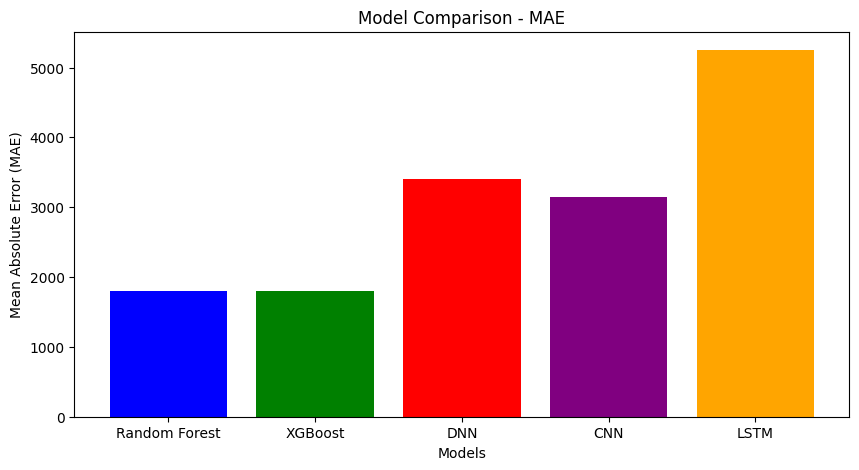

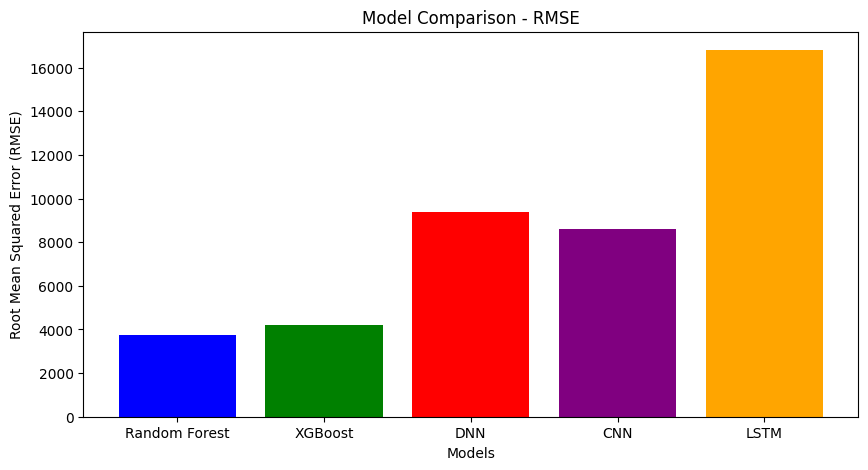

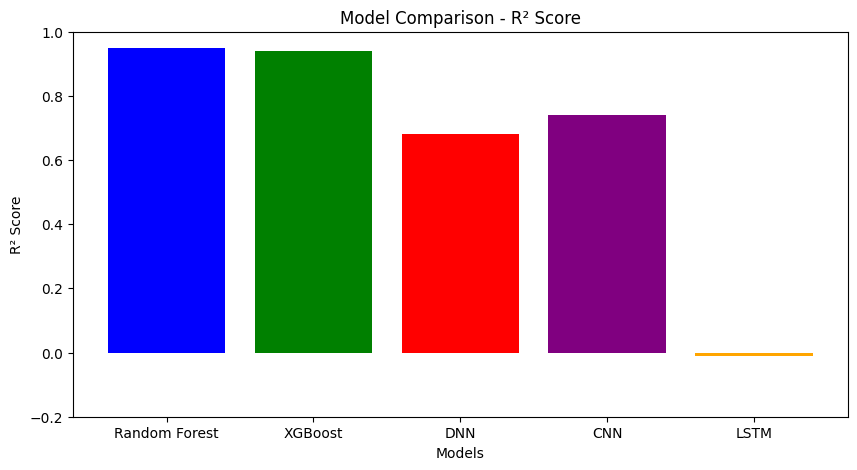

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Model Performance Metrics
model_names = ["Random Forest", "XGBoost", "DNN", "CNN", "LSTM"]
mae_values = [1798.10, 1805.82, 3405.46, 3149.45, 5250.37]
rmse_values = [3751.89, 4221.16, 9399.03, 8601.01, 16803.43]
r2_values = [0.95, 0.94, 0.68, 0.74, -0.01]

# Create a DataFrame
df = pd.DataFrame({"Model": model_names, "MAE": mae_values, "RMSE": rmse_values, "R² Score": r2_values})
print(df)

# Bar plot for MAE
plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison - MAE")
plt.show()

# Bar plot for RMSE
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Model Comparison - RMSE")
plt.show()

# Bar plot for R² Score
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.ylim(-0.2, 1.0)  # Adjust limits to show negative R²
plt.show()


# Till Now Random Forest performs the best

# Now trying some transformers based models/architecture

Implementing TabNet for Regression

Steps to Implement TabNet


1.Prepare Data: Convert spectral features into tensors

2.Define Model

3.Train & Evaluate the Model

4.Compare Performance with Previous Models


In [5]:
!pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [23]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
# Load dataset
data = pd.read_csv('/content/TASK-ML-INTERN.csv')

In [17]:
data.isnull().sum().sum()

0

In [18]:
# Drop non-numeric identifier column
data = data.drop(columns=['hsi_id'])

# Features and target
X = data.drop(columns=['vomitoxin_ppb'])
y = data['vomitoxin_ppb']


In [19]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data (TabNet is robust but scaling helps)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to NumPy (TabNet requires NumPy input)
X_train, X_test, y_train, y_test = map(np.array, [X_train, X_test, y_train, y_test])

In [20]:
# Define TabNet model
tabnet_model = TabNetRegressor(optimizer_params=dict(lr=2e-2))

# Train model
tabnet_model.fit(
    X_train, y_train.reshape(-1, 1),
    eval_set=[(X_test, y_test.reshape(-1, 1))],
    eval_metric=['rmse'],
    max_epochs=200, patience=20, batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 158569820.83333| val_0_rmse: 17291.77228|  0:00:01s
epoch 1  | loss: 159866464.66667| val_0_rmse: 17291.68074|  0:00:01s
epoch 2  | loss: 158610516.66667| val_0_rmse: 17291.61367|  0:00:01s
epoch 3  | loss: 122738498.66667| val_0_rmse: 17291.5066|  0:00:01s
epoch 4  | loss: 159367704.0| val_0_rmse: 17291.33826|  0:00:01s
epoch 5  | loss: 140305442.66667| val_0_rmse: 17291.07942|  0:00:01s
epoch 6  | loss: 158696256.0| val_0_rmse: 17290.10598|  0:00:02s
epoch 7  | loss: 159879696.0| val_0_rmse: 17289.5029|  0:00:02s
epoch 8  | loss: 159455986.66667| val_0_rmse: 17289.16694|  0:00:02s
epoch 9  | loss: 160004672.0| val_0_rmse: 17288.22963|  0:00:02s
epoch 10 | loss: 159921552.0| val_0_rmse: 17287.50116|  0:00:02s
epoch 11 | loss: 159193813.33333| val_0_rmse: 17285.48577|  0:00:02s
epoch 12 | loss: 152736376.33333| val_0_rmse: 17284.18896|  0:00:02s
epoch 13 | loss: 158460040.0| val_0_rmse: 17284.34611|  0:00:02s
epoch 14 | loss: 159536121.0| val_0_rmse: 17281.43123|  0:00

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [21]:
# Predictions
y_pred = tabnet_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


MAE: 4101.9150, RMSE: 16392.3817, R²: 0.0387


# Hyperparameter Tuning

In [24]:
tabnet_model = TabNetRegressor(
    n_d=16,  # Increase latent dimensions
    n_a=16,
    n_steps=5,  # More decision steps
    gamma=1.5,  # Stronger attention
    lambda_sparse=1e-3,  # Less regularization
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),  # Higher learning rate
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="entmax"
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
tabnet_model.fit(
    X_train_scaled, y_train.reshape(-1, 1),
    eval_set=[(X_test_scaled, y_test.reshape(-1, 1))],
    patience=20, max_epochs=300
)


epoch 0  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 1  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 2  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 3  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 4  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 5  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


epoch 6  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 7  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 8  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 9  | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 10 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 11 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 12 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 13 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 14 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 15 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 16 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 17 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 18 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 19 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s
epoch 20 | loss: 0.0     | val_0_mse: 299010366.71146|  0:00:00s

Early stopping occurred 

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [28]:
# Predictions
y_pred = tabnet_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

MAE: 4414.1912, RMSE: 17292.4576, R²: -0.0697


# TabNet is not performing good , i think data is not enough

# Thus moving ahead with Random Forest

In [15]:
import pickle

In [16]:
# Saving model using pickle
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


In [17]:
with open("random_forest_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

sample_input = X_test.iloc[:5]
predictions = loaded_model.predict(sample_input)

print("Predictions:", predictions)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [18]:
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

sample_input = X_test.iloc[:5]  # Now it works!
predictions = loaded_model.predict(sample_input)

print("Predictions:", predictions)


Predictions: [ 455.9  4278.96 1177.8   291.6  3077.7 ]


# Streamlit App Code in app.py

In [25]:
with open("pca_model.pkl", "wb") as file:
    pickle.dump(pca, file)
